<a href="https://colab.research.google.com/github/DiFedorchuk/ML_Course/blob/main/%22HW_2_1_%D0%90%D0%BD%D0%B0%D0%BB%D1%96%D0%B7_%D0%BE%D0%B7%D0%BD%D0%B0%D0%BA_%D0%B4%D0%BB%D1%8F_%D0%BF%D0%BE%D0%B1%D1%83%D0%B4%D0%BE%D0%B2%D0%B8_%D0%BB%D1%96%D0%BD%D1%96%D0%B8%CC%86%D0%BD%D0%BE%D1%97_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%97%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import pandas as pd

In [10]:
medical_df = pd.read_csv("/content/drive/MyDrive/Courses/Machine Learning/medical-charges.csv")

In [11]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Для прогнозування колонки charges можемо проаналізувати  залежність значення charges від age, sex, smoker, для цього можемо побудувати графіки для зоучності анадізу. Можемо проаналізувати скільки в середніьому платять чоловіки та жінки, скільки платять в залежності від того чи вони є курцями та від значення bmi

**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

In [12]:
!pip install plotly matplotlib seaborn --quiet

In [13]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [22]:
fig = px.histogram(medical_df,
                   x = 'charges',
                   marginal= 'box',
                   color = 'sex',
                   color_discrete_sequence= ['green', 'blue'],
                   title= 'Distribution by sex')
fig.update_layout(bargap = 0.1)
fig.show()

З візуалізації бачимо, що більшість клієнтів становлять чоловіки.
В середньому чоловіки та жінки сплачують близько 9,3к, але бачимо й викиди до 63к, швидше за все це люди з особливими показниками здоров`я


In [25]:
fig = px.histogram(medical_df,
                   x = 'charges',
                   marginal= 'box',
                   color = 'region',
                   color_discrete_sequence= ['red', 'yellow', 'green', 'blue'],
                   title= 'Distribution by region')
fig.update_layout(bargap = 0.1)
fig.show()

 З візуалізації бачимо найбільшу медіану в  northeast регіоні.
 Найменша та найбільша оплата була зроблена в southeast регіоні.
 В середньому найменші платежі в southwest регіоні

**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

In [31]:
fig = px.histogram(medical_df,
                   x = 'region',
                   marginal= 'box',
                   color = 'smoker',
                   color_discrete_sequence= ['red', 'green'],
                   title= 'Smokers by region')
fig.update_layout(bargap = 0.1)
fig.show()

На візуалізації бачимо, що в цілому у всіх регіонах кількість курців менше ніж не курців. Southeast лідирує серед кількості курців, southwest northwest мають найменше курців серед регіонів

In [32]:
fig = px.histogram(medical_df,
                   x = 'children',
                   marginal= 'box',
                   color = 'smoker',
                   color_discrete_sequence= ['red', 'green'],
                   title= 'Smokers by region')
fig.update_layout(bargap = 0.1)
fig.show()

На візуалізації бачимо, що більшість клієнтів не мають дітей. Загалом бачимо, що найбільша кількість дітей становить 5. Серед клієнтів переважають не курці, незалежно від того чи є в них діти

**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

In [35]:
fig = px.histogram(medical_df,
                   x = 'children',
                   y = 'charges',
                   marginal= 'violin',
                   color_discrete_sequence= ['red'],
                   title= 'Smokers by region')
fig.update_layout(bargap = 0.1)
fig.show()

З візуалізації ми бачимо лівоскошений графік в сторону осі Y, більшість клієнтів які оплатили стразування не мають дітей, бачимо тенденцію, що сума падає з збільшенням кількості дітей. Можемо припустити чим більше дітей мають клієнти тим менше сума страхування, можливо існує пільгова система оплати в залежності від кількості дітей

**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [36]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

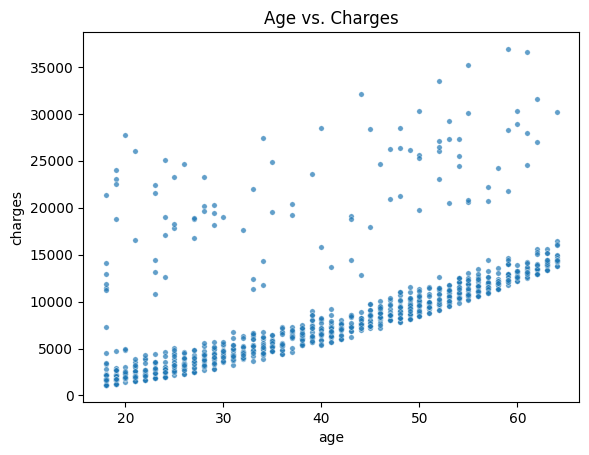

In [45]:
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15);

In [37]:
def estimate_charges(age, w, b):
    return w * age + b

In [44]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

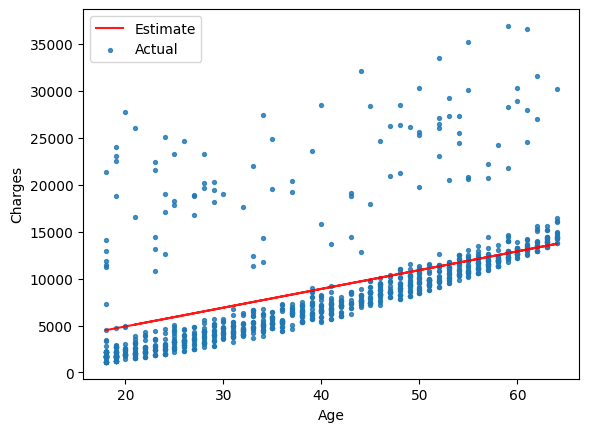

In [63]:
try_parameters(non_smoker_df, 200, 900)

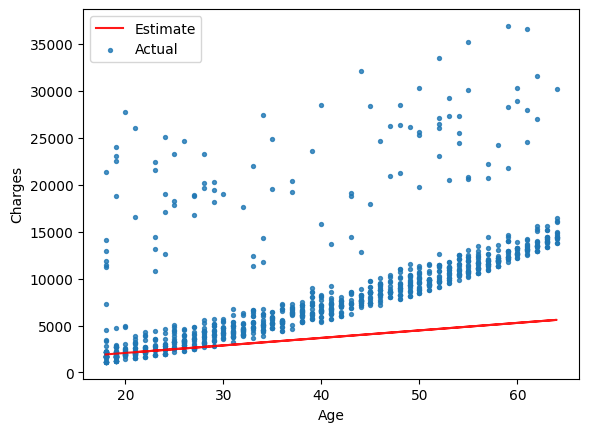

In [94]:
try_parameters(non_smoker_df, 80, 480)

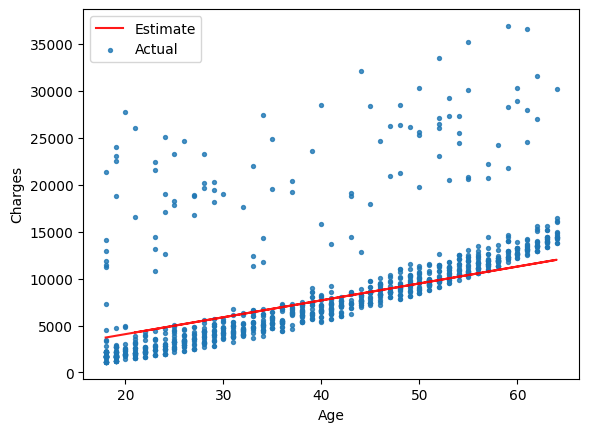

In [99]:
try_parameters(non_smoker_df, 180, 480)

Спостереження:
Чим більше ми зменшуємо w тим нижче буде стартова точка лінії відносно осі Y, чим більше збільшуємо b тим вище буде напрям лінії відносто осі Х. На третьому графіку комбінація w та b утворила лінію яка проходить майже через всю сукупність нижньої групи графіку даних

**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [100]:
import numpy as np

In [103]:
def rmse(df, w, b):
  current_data = non_smoker_df['charges']
  predict_data = estimate_charges(non_smoker_df.age, w, b)
  return np.sqrt(np.mean(np.square(current_data - predict_data)))

In [104]:
rmse(non_smoker_df, 200, 900)

np.float64(4769.970174814167)

In [105]:
rmse(non_smoker_df, 80, 480)

np.float64(7194.427359526038)

In [106]:
rmse(non_smoker_df, 180, 480)

np.float64(4898.516343206759)

Згідно розрахунку rmse найнижчий результат втрат показав перший графік.
Теоритично можна поексперементувати з значеннями w та b на функкції розрахунку rmse. На мою думку зручніше ще комбінувати з побудовою лінії на графіку, що дозволяє підтвердити візуально правильність побудови лінії. Таким чином можемо підібрати діапазон значень w та  b, шо задовільняють наше вимоги